# Mechanistic Interpretability of RNNs emulating Hidden Markov Models

In [1]:
from scripts.manager import Manager
from scripts.metrics import compare_hmm_rnn_transition_matrices, compare_hmm_rnn_euclidean_distances
from scripts.statespace import run_pipeline
from scripts.mechint import load_weights, locate_areas, noise_sensitivity, residency_plot, neuron_activities, weight_matrices, mean_activities, pca_evolution, second_order, ablation

## Training
Functions to train a single or multiple models with or without saving intermediate epochs

### Train a Single Model

Let's run a single model training with verbose output to see the training progress.

In [ ]:
manager = Manager(config_name="HMMTwo")
results = manager.run_experiment(verbose=True)

### Train Multiple Models

You can also run multiple experiments in sequence.

In [ ]:
multi_manager = Manager()
config_names = ["HMMTwo", "HMMThree", "HMMFour", "HMMFive"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=False)

### Train & Save Model per Epoch

Training the model with the option to save the model at every epoch

In [ ]:
manager = Manager(config_name="HMMTwo")
results = manager.run_training_evo(verbose=True)
print(f"Best Loss: {results['best_loss']}")
print(f"Experiment Duration: {results['experiment_duration_minutes']} minutes")

## Performance Metrics
Functions to calculate and plot Euclidean distances and transition matrices across 144 models: M = {2,3,4,5} latent states, |h| = {50, 150, 200} hidden sizes, d = {1, 10, 100, 200} input dimensions and 3 random seeds.

In [ ]:
compare_hmm_rnn_euclidean_distances()

In [ ]:
compare_hmm_rnn_transition_matrices()

## Latent Space Projections in PCA and Variance Contour Plots
Function to calculate and plot trajectories with/without gaussian inputs in PCA space and contour plots with varying input noise standard deviation across 48 models: M = {2,3,4,5} latent states, |h| = {50, 150, 200} hidden sizes, d = {1, 10, 100, 200} input dimensions.

In [ ]:
run_pipeline()

## Exploration of Latent Dynamics

Latent dynamical properties for four RNNs trained on HMMs with: 2,3,4 and 5 latent states. The RNNs analyzed share hidden size |h| = 150 and input size d = 100. The models are contained in TrainedModels/{Two, Three, Four, Five}/{hidden_150}/{input_100}/{seed_0}

### State Space Across Epochs

In [ ]:
# 2 States
pca_evolution("TrainedModels/Two/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 100, 200], purple_epoch=50)

In [ ]:
# 3 States
pca_evolution("TrainedModels/Three/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 150, 300], purple_epoch=55)

In [ ]:
# 4 States
pca_evolution("TrainedModels/Four/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 150, 300], purple_epoch=100)

In [ ]:
# 5 States
pca_evolution("TrainedModels/Five/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 50, 150, 400, 500], purple_epoch=380)

### Expected Second Order & Transition Rate

In [ ]:
# 2 States
second_order("TrainedModels/Two/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.05, bifep=None, silent=True)


In [ ]:
# 3 States
second_order("TrainedModels/Three/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.05, bifep=None, silent=True)

In [ ]:
# 4 States
second_order("TrainedModels/Four/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.03, bifep=None, silent=True)

In [ ]:
# 5 States
second_order("TrainedModels/Five/hidden_150/input_100/seed_0/models/evolution", max_epochs=500, ep_rate=10, threshold=0.02, bifep=None, silent=True)

### Residency Times and Average Logit Gradient Sign Changes

In [ ]:
# 2 States
residency_plot("Two States", "TrainedModels/Two/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

In [ ]:
# 3 States
residency_plot("Three States", "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

In [ ]:
# 4 States
residency_plot("Four States", "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

In [ ]:
# 5 States
residency_plot("Five States", "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

### Noise Sensitivity

To obtain clear results, you might need to run a couple of attempts until you obtain correct initial conditions for clusters (left three plots) and transition (right three plots) .

In [ ]:
# 2 States
W_r, W_n, W_o = load_weights("TrainedModels/Two/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Two States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

In [ ]:
# 3 States
W_r, W_n, W_o = load_weights("TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Three States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

In [ ]:
# 4 States
W_r, W_n, W_o = load_weights("TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Four States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

In [ ]:
# 5 States
W_r, W_n, W_o = load_weights("TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Five States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

## Mechanistic Interpretability

Here we uncover the neuronal circuit on a single RNN model trained on a HMM with 2 latent states contained in TrainedModel/ReverseEngineeredModel 

### Kick Neurons

In [ ]:
neuron_activities("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### Noise Integrating Populations

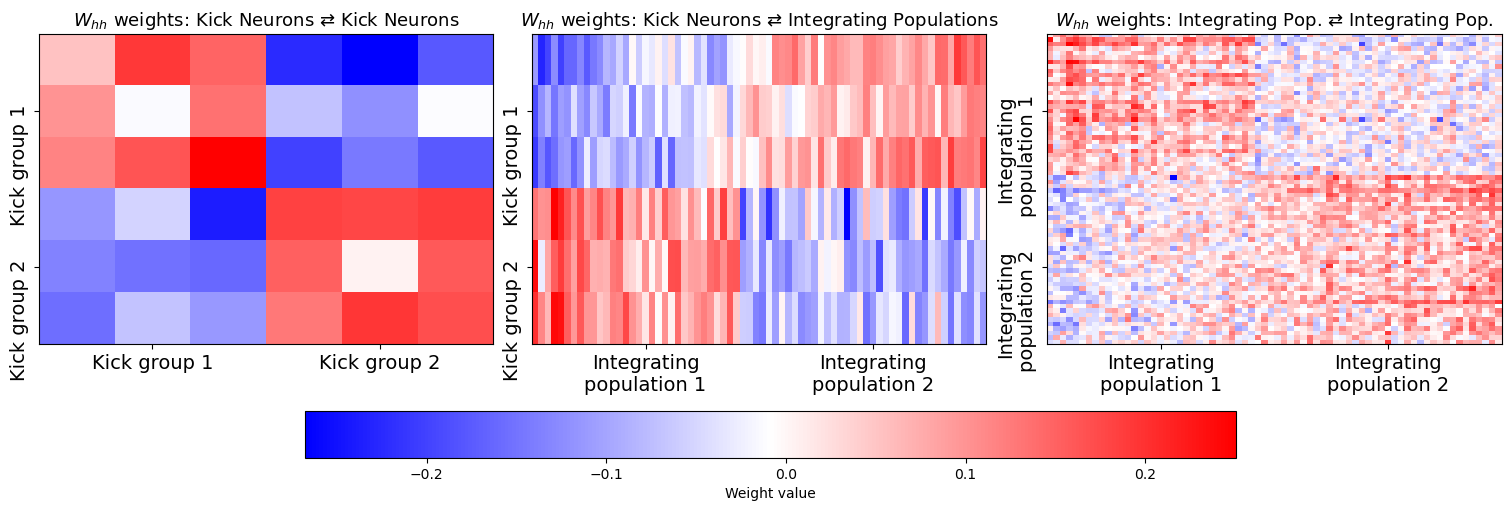

In [2]:
W_r, _, _ = load_weights("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
weight_matrices(W_r)

### Oscillations in Mean Activity of Kick Neurons and Noise Integrating Populations

In [ ]:
mean_activities("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### Ablation Studies

In [ ]:
# Ablation of Kick-Group 1 & associated Noise on Integrating Populations
ablation("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", group=0)

In [ ]:
# Ablation of Kick-Group 2 & associated Noise on Integrating Populations
ablation("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", group=1)